In [139]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [176]:
img_bgr = cv2.imread('D:/For Me/3_Dataset/Shrimp/create/25.jpg')

In [177]:
img_rgb  = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

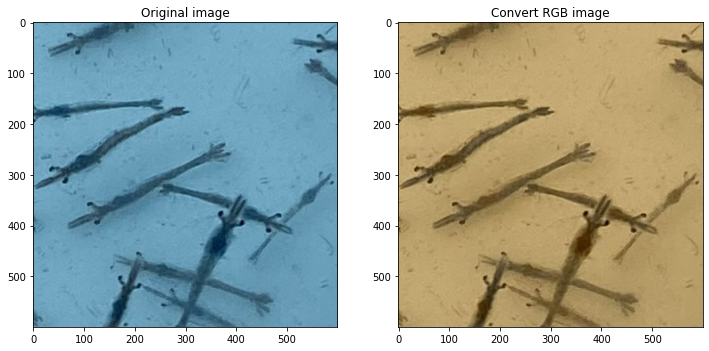

In [178]:
fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(img_bgr)
ax[0].set_title('Original image')
ax[1].imshow(img_rgb)
ax[1].set_title('Convert RGB image')
plt.show()

In [179]:
# denoise
img = cv2.fastNlMeansDenoisingColored(img_rgb,None, 10, 10, 7, 21)

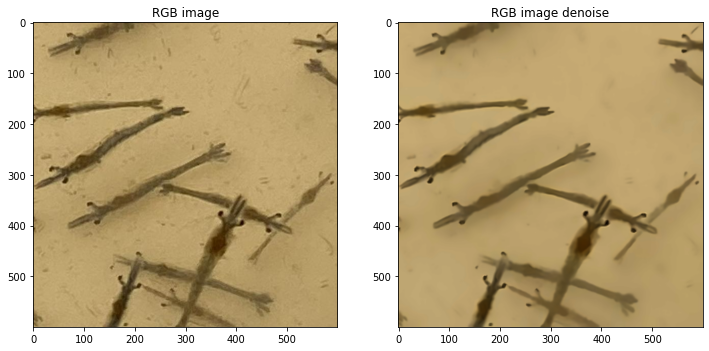

In [180]:
fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(img_rgb)
ax[0].set_title('RGB image')
ax[1].imshow(img)
ax[1].set_title('RGB image denoise')
plt.show()

In [181]:
twoDimage = img.reshape((-1, 3))
twoDimage = np.float32(twoDimage)

In [182]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 2
attempts = 10

In [183]:
ret, label, center = cv2.kmeans(twoDimage, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

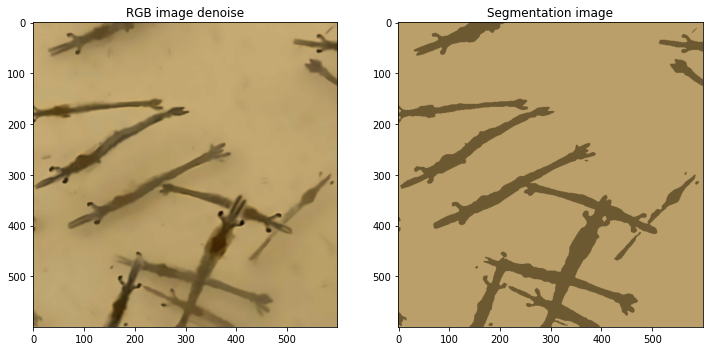

In [184]:
fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(img)
ax[0].set_title('RGB image denoise')
ax[1].imshow(result_image)
ax[1].set_title('Segmentation image')
plt.show()

In [185]:
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))

cluster_shrimp = 1
cluster_background = 0
masked_image[label.flatten() == cluster_shrimp] = [255, 255, 255]
masked_image[label.flatten() == cluster_background] = [0, 0, 0]
masked_image = masked_image.reshape((img.shape))

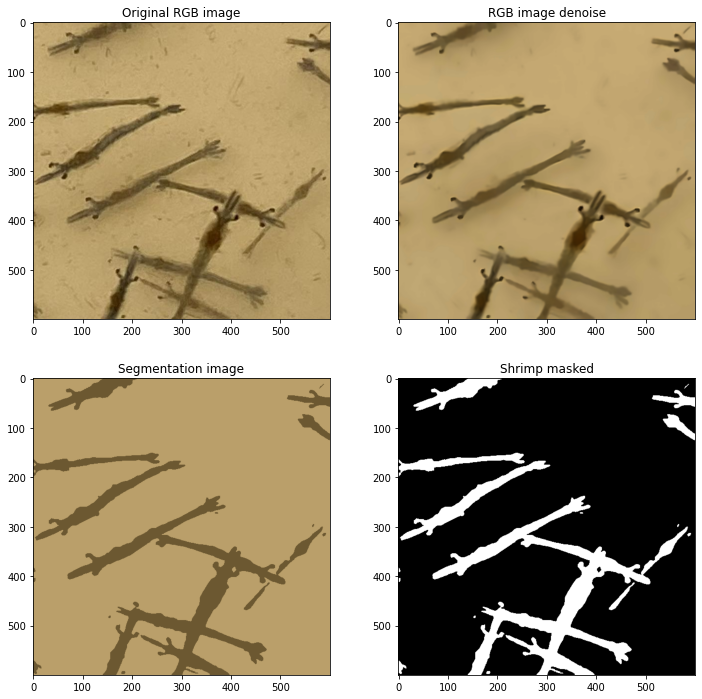

In [186]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
ax[0, 0].imshow(img_rgb)
ax[0, 0].set_title('Original RGB image')
ax[0, 1].imshow(img)
ax[0, 1].set_title('RGB image denoise')
ax[1, 0].imshow(result_image)
ax[1, 0].set_title('Segmentation image')
ax[1, 1].imshow(masked_image)
ax[1, 1].set_title('Shrimp masked')
plt.show()

In [187]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_shrimp_masked = cv2.cvtColor(masked_image, cv2.COLOR_RGB2GRAY)

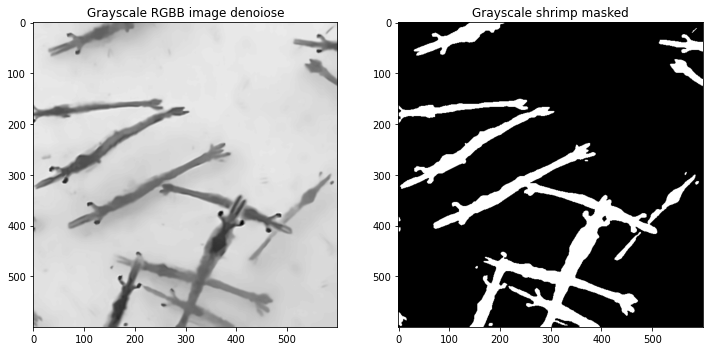

In [188]:
fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(gray_img, cmap='gray')
ax[0].set_title('Grayscale RGBB image denoiose')
ax[1].imshow(gray_shrimp_masked, cmap='gray')
ax[1].set_title('Grayscale shrimp masked')
plt.show()